In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
from collections import defaultdict
import seaborn as sns

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multitest import multipletests

from scipy.stats import shapiro, levene, rankdata, linregress, kruskal

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

from matplotlib.ticker import FuncFormatter

import helper

/gpfs1/home/c/p/cpetak/CA_GRN2/helper.py:165: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 2, 'A', False, aligned=True))
  next_step = windows.dot(grn)
/gpfs1/home/c/p/cpetak/CA_GRN2/helper.py:186: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 2, 'C', False, aligned=True), Array(float64, 2, 'A', False, aligned=True))
  next_step = gene_vals.dot(internal_grn)


(0.5, 50.0)

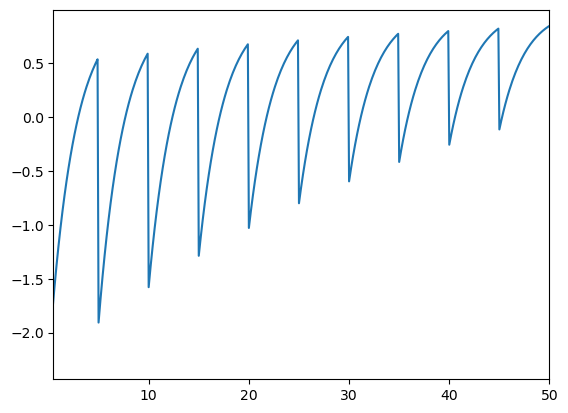

In [2]:
import math
T = 1
s = 0.5
k = 0.4
sl = 5
dd=[0] + [4.7]*100
x=np.arange(0,50,0.1)
ys=[]
count = 0
xs = []
for i in x:
    if i % sl == 0:
       #y = 0.7
       count+=1
    xs.append(i-dd[count-1]*count)
    y = T-(T-s)*math.e**(-k*(i-dd[count]*count))
    ys.append(y)
    
plt.plot(x,ys)
plt.xlim(0.5,50)

(0.5, 50.0)

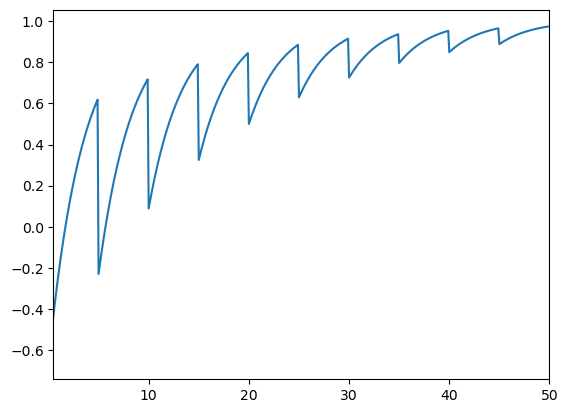

In [3]:
import math
T = 1 #MAX
s = 0.5 #MIN
k = 0.3 #RATE OF INCREASE
sl = 5 #LEN OF SEASON

dd=[0] + [4]*100
x=np.arange(0,50,0.1)
ys=[]
count = 0
xs = []
for i in x:
    if i % sl == 0:
       #y = 0.7
       count+=1
    xs.append(i-dd[count-1]*count)
    y = T-(T-s)*math.e**(-k*(i-dd[count]*count))
    ys.append(y)
    
plt.plot(x,ys)
plt.xlim(0.5,50)

0.005889479452229723


Text(0.015, 0.7, 'Fitness')

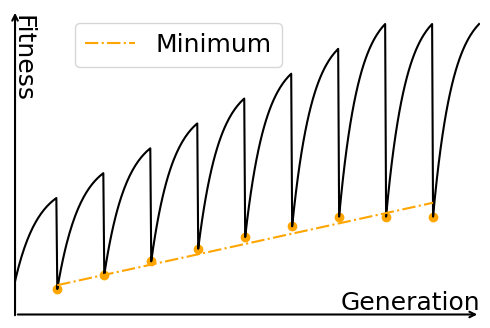

In [6]:
import math
T = 0.8
s0 = 0.5
k0 = 0.4
sl = 5
dd=[0] + [4.7]*100
x=np.arange(0,50,0.1)
ys=[]
count = 0
xs = []
for i in x:
    if i % sl == 0:
       #y = 0.7
       #print(i)
       count=count+1
       #count=count/1.01
    if count <= 7:
        s=s0-0.01*count
        k=k0+0.01*count
        y = T-(T-s)*math.e**(-k*(i-5*count))
        y = y + 0.5*count
    else:
        s=s0-0.01*8
        k=k0+0.01*8
        y = T-(T-s)*math.e**(-k*(i-5*count))
        y = y + 0.5*8
        
    ys.append(y)


def rescale(values, new_min=0.2, new_max=1.0):
    old_min = min(values)
    old_max = max(values)
    return [
        new_min + (v - old_min) * (new_max - new_min) / (old_max - old_min)
        for v in values
    ]

fig = plt.figure(figsize=(6,4))

ys=rescale(ys)
plt.plot(x,ys, color="black")
plt.scatter(x[::50], ys[::50], color = "orange")
#plt.axhline(1)
plt.xlim(0.5,50)
#plt.xticks(ticks=[10, 20, 30, 40, 50], labels=["600", "1200", "1800", "2400", "3000"])
#plt.xlabel("Generations")
#plt.ylabel("Fitness")
#plt.gca().spines["top"].set_visible(False)
#plt.gca().spines["right"].set_visible(False)


m, b = np.polyfit(x[::50], ys[::50], 1)
best_fit = m * x[::50] + b

x_fit = np.linspace(x[::50][1], x[::50].max(), 100)
y_fit = m * x_fit + b

plt.plot(x_fit, y_fit, color='orange', linestyle="-.", label="Minimum")
print(m)
plt.legend(loc="upper right", bbox_to_anchor=(0.6, 1), fontsize=18)

# Get the current axis
ax = plt.gca()

# Remove standard spines
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)

# Remove ticks
plt.xticks([])
plt.yticks([])

# Draw x and y arrows
# x-axis arrow
plt.annotate('', xy=(1, 0.17), xytext=(0, 0.17),
             xycoords=('axes fraction', 'data'), textcoords=('axes fraction', 'data'),
             arrowprops=dict(arrowstyle='->', linewidth=1.5, color='black'))

# y-axis arrow
plt.annotate('', xy=(0.5, 1), xytext=(0.5, 0),
             xycoords=('data', 'axes fraction'), textcoords=('data', 'axes fraction'),
             arrowprops=dict(arrowstyle='->', linewidth=1.5, color='black'))

plt.text(0.7, 0.05, 'Generation', transform=ax.transAxes,
         ha='left', va='center', fontsize=18)

# Add custom "y" label
plt.text(0.015, 0.7, 'Fitness', transform=ax.transAxes,
         ha='center', va='bottom', fontsize=18, rotation=90+180)


0.0077751338073769015


Text(0.015, 0.7, 'Fitness')

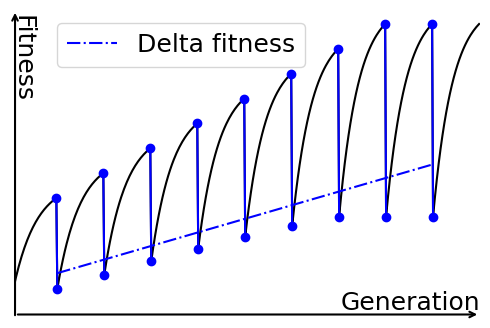

In [7]:
import math
T = 0.8
s0 = 0.5
k0 = 0.4
sl = 5
dd=[0] + [4.7]*100
x=np.arange(0,50,0.1)
ys=[]
count = 0
xs = []
for i in x:
    if i % sl == 0:
       #y = 0.7
       #print(i)
       count=count+1
       #count=count/1.01
    if count <= 7:
        s=s0-0.01*count
        k=k0+0.01*count
        y = T-(T-s)*math.e**(-k*(i-5*count))
        y = y + 0.5*count
    else:
        s=s0-0.01*8
        k=k0+0.01*8
        y = T-(T-s)*math.e**(-k*(i-5*count))
        y = y + 0.5*8
        
    ys.append(y)


def rescale(values, new_min=0.2, new_max=1.0):
    old_min = min(values)
    old_max = max(values)
    return [
        new_min + (v - old_min) * (new_max - new_min) / (old_max - old_min)
        for v in values
    ]

fig = plt.figure(figsize=(6,4))

ys=rescale(ys)
plt.plot(x,ys, color="black")

x=np.array(x)
ys=np.array(ys)

indices = np.arange(49, len(x), 50)

#plt.scatter(x[indices], ys[indices], color = "orange")

#plt.scatter(x[::50], ys[::50], color = "orange")

x2=x[indices]
x1=x[::50]
y2=ys[indices]
y1=ys[::50]

ds=[]
for i in range(len(x1)-1):
    plt.plot([x1[i+1], x2[i]], [y1[i+1], y2[i]], color='b', marker='o')
    d = y2[i] - y1[i+1]
    ds.append(d)

#plt.scatter(x[::50][:-1], ds, color="black")

plt.xlim(0.5,50)
# plt.xticks(ticks=[10, 20, 30, 40, 50], labels=["600", "1200", "1800", "2400", "3000"])
# plt.xlabel("Generations")
# plt.ylabel("Fitness")
# plt.gca().spines["top"].set_visible(False)
# plt.gca().spines["right"].set_visible(False)

m, b = np.polyfit(x[::50][:-1], ds, 1)
best_fit = m * x[::50] + b

x_fit = np.linspace(x[::50][1], x[::50].max(), 100)
y_fit = m * x_fit + b

plt.plot(x_fit, y_fit, color='blue', linestyle="-.", label="Delta fitness")
print(m)

plt.legend(loc="upper right", bbox_to_anchor=(0.65, 1), fontsize=18)

# Get the current axis
ax = plt.gca()

# Remove standard spines
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)

# Remove ticks
plt.xticks([])
plt.yticks([])

# Draw x and y arrows
# x-axis arrow
plt.annotate('', xy=(1, 0.17), xytext=(0, 0.17),
             xycoords=('axes fraction', 'data'), textcoords=('axes fraction', 'data'),
             arrowprops=dict(arrowstyle='->', linewidth=1.5, color='black'))

# y-axis arrow
plt.annotate('', xy=(0.5, 1), xytext=(0.5, 0),
             xycoords=('data', 'axes fraction'), textcoords=('data', 'axes fraction'),
             arrowprops=dict(arrowstyle='->', linewidth=1.5, color='black'))

plt.text(0.7, 0.05, 'Generation', transform=ax.transAxes,
         ha='left', va='center', fontsize=18)

# Add custom "y" label
plt.text(0.015, 0.7, 'Fitness', transform=ax.transAxes,
         ha='center', va='bottom', fontsize=18, rotation=90+180)

In [ ]:
seed_intss = [[69904,149796],[4147842,1238860],[1677032,1410667],[2607162,1754028],[286634,159689],[2961036,153075],[3430997,2634107]]
metric="avefits"
season_len = 300
num_reps=15
root="~/CA_GRN_results/detailed_save/"#extra_inputs/"
root="~/CA_GRN_results/non_detailed_save/"#extra_inputs/"
#root="~/scratch/non_detailed_save/full_pheno_std_long/"
id_start=0
seed_ints = seed_intss[1]

num_gens = 10_000

rules = [22, 126, 154, 18, 122, 70,54,94,30,50,62,110,90,150,102]

mylines=False

s1drops=[]
s2drops=[]
fitdeltas1=[]
fitdeltas2=[]
gens2back1=[]
gens2back2=[]
for rule in rules:
    fig, ax=plt.subplots(nrows=1,ncols=1, figsize=(10, 5),sharex=True) #sharey=True)
    all_maxs=helper.get_fits([rule,rule], seed_ints, metric, root, season_len, num_reps, id_start, extrapolate=True)
    all_maxs=np.array(all_maxs)
    #vari_maxs=[np.loadtxt(os.path.expanduser(root+f"variable/stats_{season_len}_{rule}-{rule}_{seed_ints[0]}-{seed_ints[1]}_{i+1+id_start}_{metric}.txt")) for i in range(num_reps)]


    labels=["Variable","Static 1","Static 2"]
    colors = ["green", "lightblue", "orange"]
    z_value = 1.96  # For a 95% confidence interval

    m=all_maxs[0]
    mean1 = np.mean(m, axis=0)

    # HOW MUCH THEY DROP?
    season_starts1 = mean1[::300][1:][1::2]
    season_starts2 = mean1[::300][1:][::2]
    #print(len(season_starts1), season_starts1)
    #print(len(season_starts2), season_starts2)
    plt.scatter(list(range(0,num_gens))[::300][1:-1][1::2], season_starts1, color="orange")
    plt.scatter(list(range(0,num_gens))[::300][1:-1][::2], season_starts2, color="blue")
    s1drops.append(season_starts1)
    s2drops.append(season_starts2)

    # HOW FAST FITNESS INCREASE
    s1_x_gens_late_idx = np.arange(0,9899)[300::300][1::2] - 1
    s2_x_gens_late_idx = np.arange(0,9899)[300::300][::2] - 1
    fit_delta1 = mean1[s1_x_gens_late_idx] - season_starts1
    fit_delta2 = mean1[s2_x_gens_late_idx] - season_starts2   
    plt.scatter(s1_x_gens_late_idx, mean1[s1_x_gens_late_idx], color="orange",alpha=0.5)
    plt.scatter(s2_x_gens_late_idx, mean1[s2_x_gens_late_idx], color="blue",alpha=0.5)
    fitdeltas1.append(fit_delta1)
    fitdeltas2.append(fit_delta2)
    
    #The line itself
    stderr1 = np.std(m, axis=0) / np.sqrt(num_reps)
    ci_upper = mean1 + z_value * stderr1
    ci_lower = mean1 - z_value * stderr1
    ax.fill_between(range(len(mean1)), ci_lower, ci_upper, alpha=0.3,color=colors[0])
    ax.plot(mean1, "-", label= labels[0], color=colors[0])
    ax.set_xlim(-100,num_gens)
    #plt.axvline(10_000)

    m_s1=all_maxs[1]
    means2 = np.mean(m_s1, axis=0)
    ax.plot(means2, "-", color="red")

    m_s2=all_maxs[2]
    means3 = np.mean(m_s2, axis=0)
    ax.plot(means3, "-", color="blue")

    # HOW QUICK THEY RECOVER?
    if True:
        means = np.append(mean1,mean1[-1]) #to make it 9900
        means = means.reshape(33,300)
        means2 = means[1::2] #means1[:,0] == s1_drops
        means1 = means[::2] #means2[:,0] == s2_drops
        maxs1 = np.max(means1,axis=1)
        maxs2 = np.max(means2,axis=1)

        threshold=maxs1[:-1]-0.005#-maxs1[:-1]*0.01
        mask = means1[1:] >= threshold[:, None] #shifting so that the first max is compared to the second season... also -0.005 is so that very close is considered as same
        indices_per_row = [np.where(mask[i])[0] for i in range(means1.shape[0]-1)]
        succ_gens1 = [i[0] if len(i)>0 else None for i in indices_per_row]
        adj_vals = [600 * (i + 1) for i in range(len(succ_gens1))]
        adj_succ_gens1 = [x + y if x is not None and y is not None else None for x, y in zip(succ_gens1, adj_vals)]
        #print(adj_vals)
        if mylines:
            plt.scatter(adj_succ_gens1, [0.7]*len(adj_succ_gens1), color="orange", marker='s')
            for x in adj_succ_gens1:
                if x is not None:
                    plt.axvline(x=x, color='orange', linestyle='--', linewidth=2)

        threshold=maxs2[:-1]-0.005#-maxs2[:-1]*0.01
        mask = means2[1:] >= threshold[:, None] #shifting so that the first max is compared to the second season...
        indices_per_row = [np.where(mask[i])[0] for i in range(means2.shape[0]-1)]
        succ_gens2 = [i[0] if len(i)>0 else None for i in indices_per_row]
        adj_vals = [600 * (i + 1) + 300 for i in range(len(succ_gens2))]
        adj_succ_gens2 = [x + y if x is not None and y is not None else None for x, y in zip(succ_gens2, adj_vals)]
        #print(adj_vals)
        if mylines:
            plt.scatter(adj_succ_gens2, [0.7]*len(adj_succ_gens2), color="blue", marker='s')
            for x in adj_succ_gens2:
                if x is not None:
                    plt.axvline(x=x, color='blue', linestyle='--', linewidth=2)
        gens2back1.append(succ_gens1)
        gens2back2.append(succ_gens2)


    for j in range(0, len(mean1), season_len):
        if j % (season_len * 2) == 0:
            ax.axvline(j, linestyle="--", color="gray", alpha=0.3)
        else:
            ax.axvline(j, linestyle=":", color="gray", alpha=0.3)
    
    
    print(rule)

    plt.ylabel("Maximum Fitness", fontsize="18")
    plt.xlabel("Generations", fontsize="18")
    ax.tick_params(axis='both', which='major', labelsize=18)

    def format_yticks(tick, _):
        return f"{tick:.2f}"

    plt.gca().yaxis.set_major_formatter(FuncFormatter(format_yticks))
    
    plt.grid(axis='y')

#plt.xlim(250,350)
    plt.show()



    

In [32]:
seed_intss = [[69904,149796],[4147842,1238860],[1677032,1410667],[2607162,1754028],[286634,159689],[2961036,153075],[3430997,2634107]]
metric="avefits"
season_len = 300
num_reps=15
root="~/CA_GRN_results/detailed_save/"#extra_inputs/"
#root="~/scratch/non_detailed_save/extra_inputs/"
id_start=0
seed_ints = seed_intss[0]

rules = [22, 126, 154, 18, 122, 70,54,94,30,50,62,110,90,150,102]

mylines=False

s1drops=[]
s2drops=[]
fitdeltas1=[]
fitdeltas2=[]
gens2back1=[]
gens2back2=[]
c=0
for si in seed_intss:
    if c==0:
        myroot=root
    elif c==1:
        myroot="~/CA_GRN_results/non_detailed_save/"#extra_inputs/"
    else:
        myroot="~/CA_GRN_results/non_detailed_save/extra_inputs/"
    c+=1
    for rule in rules:
        #fig, ax=plt.subplots(nrows=1,ncols=1, figsize=(10, 5),sharex=True) #sharey=True)
        all_maxs=helper.get_fits([rule,rule], si, metric, myroot, season_len, num_reps, id_start, extrapolate=True)
        all_maxs=np.array(all_maxs)
        labels=["Variable","Static 1","Static 2"]
        colors = ["green", "lightblue", "orange"]
        z_value = 1.96  # For a 95% confidence interval

        m=all_maxs[0]
        mean1 = np.mean(m, axis=0)

        # HOW MUCH THEY DROP?
        season_starts1 = mean1[::300][1:][1::2]
        season_starts2 = mean1[::300][1:][::2]
        
        s1drops.append(season_starts1)
        s2drops.append(season_starts2)

        # HOW FAST FITNESS INCREASE
        s1_x_gens_late_idx = np.arange(0,9899)[300::300][1::2] -1
        s2_x_gens_late_idx = np.arange(0,9899)[300::300][::2] -1
        fit_delta1 = mean1[s1_x_gens_late_idx] - season_starts1
        fit_delta2 = mean1[s2_x_gens_late_idx] - season_starts2   
        fitdeltas1.append(fit_delta1)
        fitdeltas2.append(fit_delta2)
        
        #The line itself
        stderr1 = np.std(m, axis=0) / np.sqrt(num_reps)
        ci_upper = mean1 + z_value * stderr1
        ci_lower = mean1 - z_value * stderr1
        

        # HOW QUICK THEY RECOVER?
        means = np.append(mean1,mean1[-1]) #to make it 9900
        means = means.reshape(33,300)
        means2 = means[1::2] #means1[:,0] == s1_drops
        means1 = means[::2] #means2[:,0] == s2_drops
        maxs1 = np.max(means1,axis=1)
        maxs2 = np.max(means2,axis=1)

        mask = means1[1:] >= maxs1[:-1][:, None]-0.005 #shifting so that the first max is compared to the second season... also -0.005 is so that very close is considered as same
        indices_per_row = [np.where(mask[i])[0] for i in range(means1.shape[0]-1)]
        succ_gens1 = [i[0] if len(i)>0 else None for i in indices_per_row]
        adj_vals = [600 * (i + 1) for i in range(len(succ_gens1))]
        adj_succ_gens1 = [x + y if x is not None and y is not None else None for x, y in zip(succ_gens1, adj_vals)]
        

        mask = means2[1:] >= maxs2[:-1][:, None]-0.005 #shifting so that the first max is compared to the second season...
        indices_per_row = [np.where(mask[i])[0] for i in range(means2.shape[0]-1)]
        succ_gens2 = [i[0] if len(i)>0 else None for i in indices_per_row]
        adj_vals = [600 * (i + 1) + 300 for i in range(len(succ_gens2))]
        adj_succ_gens2 = [x + y if x is not None and y is not None else None for x, y in zip(succ_gens2, adj_vals)]
        #print(adj_vals)
        
        gens2back1.append(succ_gens1)
        gens2back2.append(succ_gens2)


        print(rule)



    

22
126
154
18
122
70
54
94
30
50
62
110
90
150
102
22
126
154
18
122
70
54
94
30
50
62
110
90
150
102
22
126
154
18
122
70
54
94
30
50
62
110
90
150
102
22
126
154
18
122
70
54
94
30
50
62
110
90
150
102
22
126
154
18
122
70
54
94
30
50
62
110
90
150
102
22
126
154
18
122
70
54
94
30
50
62
110
90
150
102
22
126
154
18
122
70
54
94
30
50
62
110
90
150
102


In [34]:
len(fitdeltas1)

105

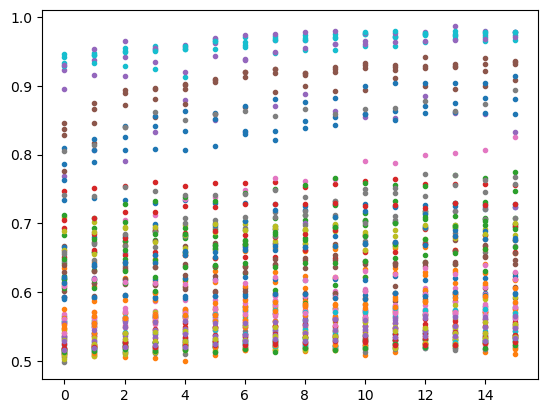

Slope: 0.0020948513455917297, Intercept: 0.63177526247562


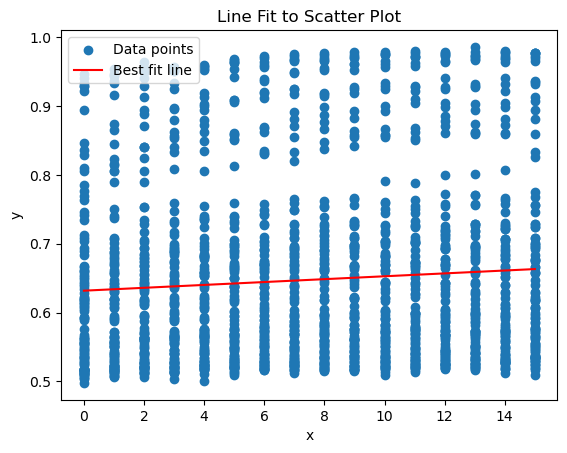

In [35]:
x=[]
y=[]
for g in s1drops:
    #g = [j for j in g if j is not None] #
    #g = [299 if j is None else j for j in g]
    #g = g[11:] #only get second half
    plt.plot(g, ".")
    for i in g:
        y.append(i)
    for j in range(len(g)):
        x.append(j)
plt.show()

y=np.array(y)
x=np.array(x)

# Fit a line (1st degree polynomial)
coefficients = np.polyfit(x, y, 1)  # slope and intercept
slope, intercept = coefficients
print(f"Slope: {slope}, Intercept: {intercept}")

# Create fitted line
y_fit = slope * x + intercept

# Plot
plt.scatter(x, y, label='Data points')
plt.plot(x, y_fit, color='red', label='Best fit line')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Line Fit to Scatter Plot')
plt.show()


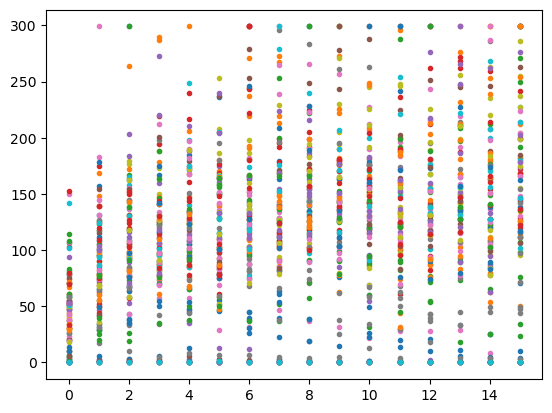

Slope: 4.210392156862732, Intercept: 81.85777310924377


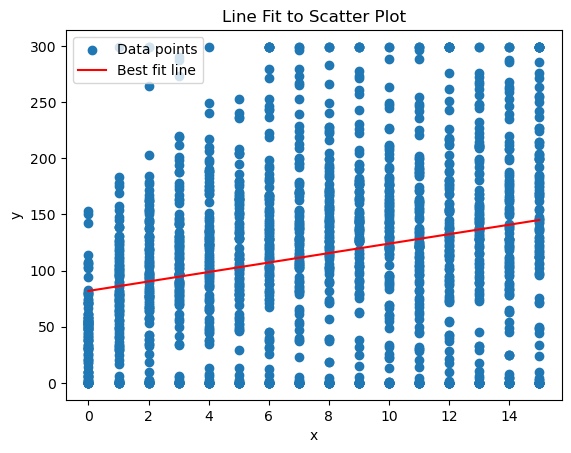

In [7]:
x=[]
y=[]
for g in gens2back1:
    #g = [j for j in g if j is not None] #
    g = [299 if j is None else j for j in g]
    #g = g[11:] #only get second half
    plt.plot(g, ".")
    for i in g:
        y.append(i)
    for j in range(len(g)):
        x.append(j)
plt.show()

y=np.array(y)
x=np.array(x)

# Fit a line (1st degree polynomial)
coefficients = np.polyfit(x, y, 1)  # slope and intercept
slope, intercept = coefficients
print(f"Slope: {slope}, Intercept: {intercept}")

# Create fitted line
y_fit = slope * x + intercept

# Plot
plt.scatter(x, y, label='Data points')
plt.plot(x, y_fit, color='red', label='Best fit line')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Line Fit to Scatter Plot')
plt.show()


In [21]:
#Diff rules
seed_intss=[69904,149796,4147842,1238860,1677032,1410667,2607162,1754028,286634,159689,2961036,153075,3430997,2634107]
metric="maxfits"
season_len = 300
num_reps=15
root0="~/scratch/non_detailed_save/diff_rules/"
root1="~/CA_GRN_results/non_detailed_save/extra_inputs/"
root2="~/CA_GRN_results/non_detailed_save/"
root3="~/CA_GRN_results/detailed_save/"
id_start=0
seed_ints = seed_intss[0]

rules=[[22,18],[154,126],[122,70],[54,94],[30,62],[110,90],[150,102]]

mylines=False

s1drops=[]
s2drops=[]
fitdeltas1=[]
fitdeltas2=[]
gens2back1=[]
gens2back2=[]

for rule in rules:
    for idx, seed_int in enumerate(seed_intss):

        if idx < 2:
            root=root3
        elif idx == 2 or idx == 3:
            root=root2
        else:
            root=root1

        #fig, ax=plt.subplots(nrows=1,ncols=1, figsize=(10, 5),sharex=True) #sharey=True)
        all_maxs=helper.get_fits_dr(rule, seed_int, metric, root0, root, season_len, num_reps, id_start=0)
        all_maxs=np.array(all_maxs)
        labels=["Variable","Static 1","Static 2"]
        colors = ["green", "lightblue", "orange"]
        z_value = 1.96  # For a 95% confidence interval

        m=all_maxs[0]
        mean1 = np.mean(m, axis=0)

        # HOW MUCH THEY DROP?
        season_starts1 = mean1[::300][1:][1::2]
        season_starts2 = mean1[::300][1:][::2]
        
        s1drops.append(season_starts1)
        s2drops.append(season_starts2)

        # HOW FAST FITNESS INCREASE
        s1_x_gens_late_idx = np.arange(0,9899)[300::300][1::2] -1
        s2_x_gens_late_idx = np.arange(0,9899)[300::300][::2] -1
        fit_delta1 = mean1[s1_x_gens_late_idx] - season_starts1
        fit_delta2 = mean1[s2_x_gens_late_idx] - season_starts2   
        
        fitdeltas1.append(fit_delta1)
        fitdeltas2.append(fit_delta2)
        
        #The line itself
        stderr1 = np.std(m, axis=0) / np.sqrt(num_reps)
        ci_upper = mean1 + z_value * stderr1
        ci_lower = mean1 - z_value * stderr1
        #ax.fill_between(range(len(mean1)), ci_lower, ci_upper, alpha=0.3,color=colors[0])
        #ax.plot(mean1, "-", label= labels[0], color=colors[0])
        #ax.set_xlim(-100,10_000)

        # HOW QUICK THEY RECOVER?
        means = np.append(mean1,mean1[-1]) #to make it 9900
        means = means.reshape(33,300)
        means2 = means[1::2] #means1[:,0] == s1_drops
        means1 = means[::2] #means2[:,0] == s2_drops
        maxs1 = np.max(means1,axis=1)
        maxs2 = np.max(means2,axis=1)

        mask = means1[1:] >= maxs1[:-1][:, None]-0.005 #shifting so that the first max is compared to the second season... also -0.005 is so that very close is considered as same
        indices_per_row = [np.where(mask[i])[0] for i in range(means1.shape[0]-1)]
        succ_gens1 = [i[0] if len(i)>0 else None for i in indices_per_row]
        adj_vals = [600 * (i + 1) for i in range(len(succ_gens1))]
        adj_succ_gens1 = [x + y if x is not None and y is not None else None for x, y in zip(succ_gens1, adj_vals)]
        

        mask = means2[1:] >= maxs2[:-1][:, None]-0.005 #shifting so that the first max is compared to the second season...
        indices_per_row = [np.where(mask[i])[0] for i in range(means2.shape[0]-1)]
        succ_gens2 = [i[0] if len(i)>0 else None for i in indices_per_row]
        adj_vals = [600 * (i + 1) + 300 for i in range(len(succ_gens2))]
        adj_succ_gens2 = [x + y if x is not None and y is not None else None for x, y in zip(succ_gens2, adj_vals)]
        #print(adj_vals)
        
        gens2back1.append(succ_gens1)
        gens2back2.append(succ_gens2)


        print(rule)



    

[22, 18]
[22, 18]
[22, 18]
[22, 18]
[22, 18]
[22, 18]
[22, 18]
[22, 18]
[22, 18]
[22, 18]
[22, 18]
[22, 18]
[22, 18]
[22, 18]
[154, 126]
[154, 126]
[154, 126]
[154, 126]
[154, 126]
[154, 126]
[154, 126]
[154, 126]
[154, 126]
[154, 126]
[154, 126]
[154, 126]
[154, 126]
[154, 126]
[122, 70]
[122, 70]
[122, 70]
[122, 70]
[122, 70]
[122, 70]
[122, 70]
[122, 70]
[122, 70]
[122, 70]
[122, 70]
[122, 70]
[122, 70]
[122, 70]
[54, 94]
[54, 94]
[54, 94]
[54, 94]
[54, 94]
[54, 94]
[54, 94]
[54, 94]
[54, 94]
[54, 94]
[54, 94]
[54, 94]
[54, 94]
[54, 94]
[30, 62]
[30, 62]
[30, 62]
[30, 62]
[30, 62]
[30, 62]
[30, 62]
[30, 62]
[30, 62]
[30, 62]
[30, 62]
[30, 62]
[30, 62]
[30, 62]
[110, 90]
[110, 90]
[110, 90]
[110, 90]
[110, 90]
[110, 90]
[110, 90]
[110, 90]
[110, 90]
[110, 90]
[110, 90]
[110, 90]
[110, 90]
[110, 90]
[150, 102]
[150, 102]
[150, 102]
[150, 102]
[150, 102]
[150, 102]
[150, 102]
[150, 102]
[150, 102]
[150, 102]
[150, 102]
[150, 102]
[150, 102]
[150, 102]


In [13]:
all_exp_drop1=[]
all_exp_drop2=[]
all_exp_inc1=[]
all_exp_inc2=[]
all_exp_delta1=[]
all_exp_delta2=[]

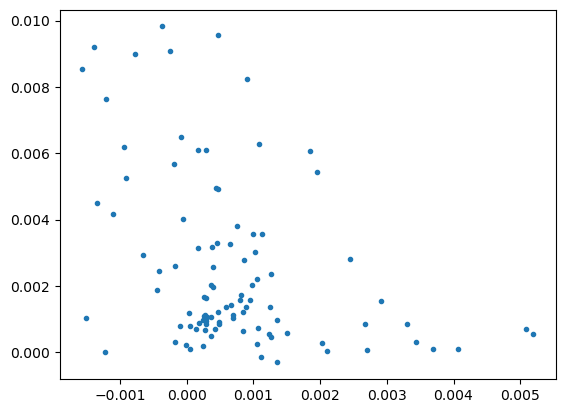

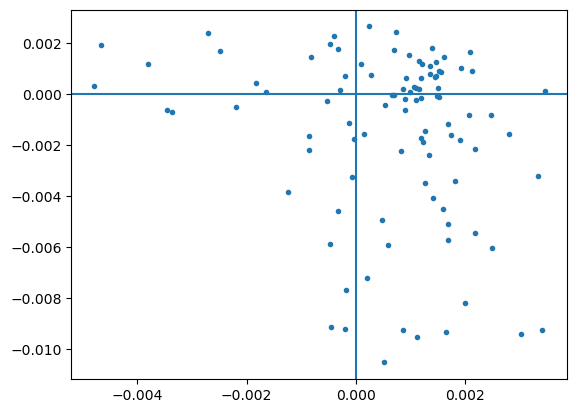

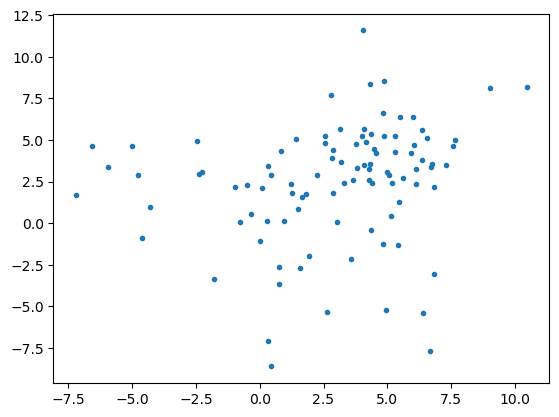

In [22]:
def get_slopes(xs):
    outs=[]
    for i in range(98):
        #print(xs[i])
        xs[i] = [299 if j is None else j for j in xs[i]]
        #xs[i] = xs[i][11:]
        #print(xs[i])
        slope, intercept = np.polyfit(np.arange(0,len(xs[i])), xs[i], 1)
        outs.append(slope)
    return outs


labels=[str(rule)+str(init) for rule, init in zip(np.array(seed_intss).repeat(len(rules),axis=0),rules * len(seed_intss)) ]
#labels=rules

x=get_slopes(s1drops)
y=get_slopes(s2drops)
plt.plot(x,y,".")
#for xi, yi, label in zip(x, y, labels):
    #plt.text(xi, yi, label, fontsize=12, ha='right', va='bottom')
plt.show()
all_exp_drop1.append(x)
all_exp_drop2.append(y)

x=get_slopes(fitdeltas1)
y=get_slopes(fitdeltas2)
plt.plot(x,y,".")
plt.axvline(0)
plt.axhline(0)
# #for xi, yi, label in zip(x, y, rules):
#     #plt.text(xi, yi, label, fontsize=12, ha='right', va='bottom')
plt.show()
all_exp_delta1.append(x)
all_exp_delta2.append(y)

x=get_slopes(gens2back1)
y=get_slopes(gens2back2)
plt.plot(x,y,".")
#for xi, yi, label in zip(x, y, labels):
    #plt.text(xi, yi, label, fontsize=12, ha='right', va='bottom')
plt.show()
all_exp_inc1.append(x)
all_exp_inc2.append(y)




In [2]:
import pickle
with open('evolv_measures2.pkl', 'rb') as f:
    loaded_data = pickle.load(f)


all_exp_drop1 = loaded_data["drops1"]
all_exp_drop2 = loaded_data["drops2"]
all_exp_delta1 = loaded_data["delta1"]
all_exp_delta2 = loaded_data["delta2"]

/users/c/p/cpetak/miniconda3/envs/ca_grn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/users/c/p/cpetak/miniconda3/envs/ca_grn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/users/c/p/cpetak/miniconda3/envs/ca_grn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/users/c/p/cpetak/miniconda3/envs/ca_grn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as

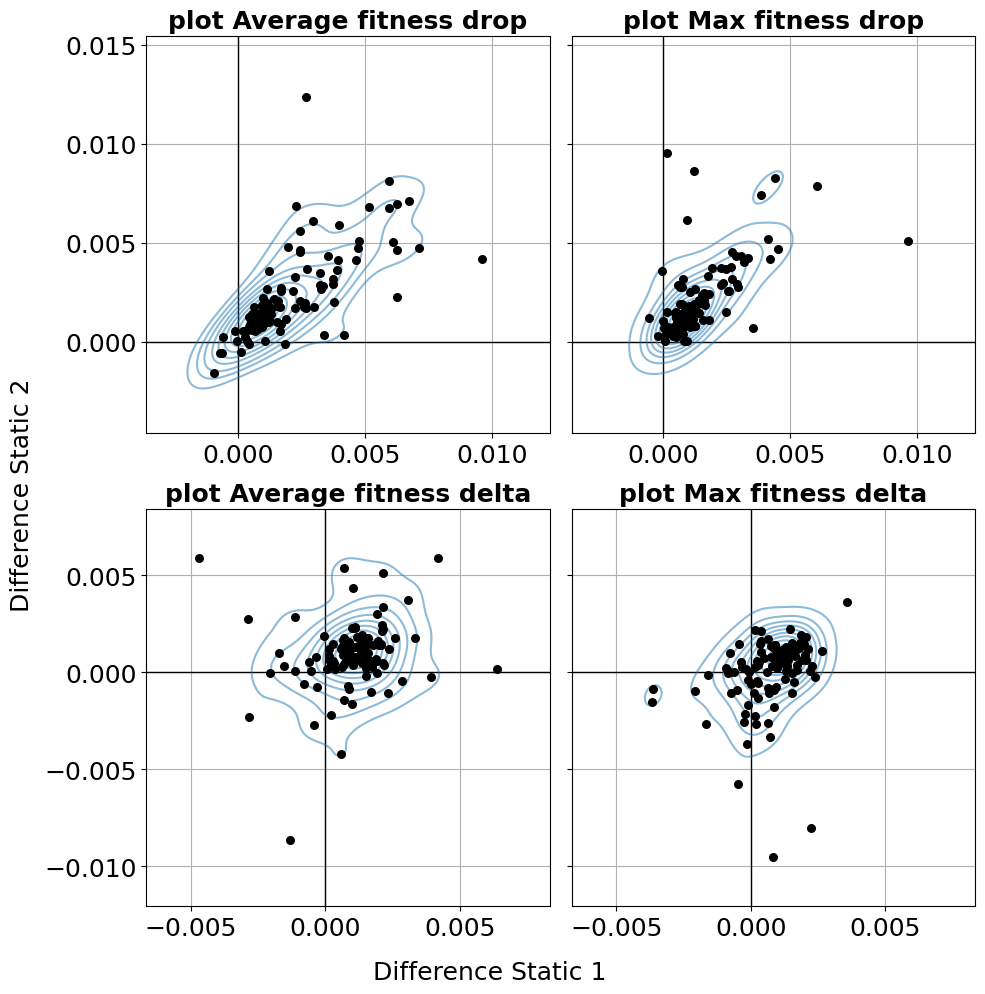

In [4]:
# Main figure and subplots
#fig, axs = plt.subplots(figsize=(6, 12), ncols=2, nrows = 2, sharex=True, sharey=True)
#axs = axs.flatten()

nrows,ncols = 2,2
scale = 5
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*scale, nrows*scale), sharex="row", sharey="row")
axs = axs.flatten()

titles=["Average fitness drop", "Max fitness drop","Average fitness delta", "Max fitness delta" ]

# Add lines to subplots
for idx,ax in enumerate(axs):
    ax.axvline(0, lw=1, color="black", zorder=1, alpha=1)
    ax.axhline(0, lw=1, color="black", zorder=1, alpha=1)

    if idx < 2:

        sns.kdeplot(x = all_exp_drop1[idx], y = all_exp_drop2[idx], ax=ax,fill=False,thresh=0.1,zorder=1,alpha=0.5)
        ax.scatter(all_exp_drop1[idx],all_exp_drop2[idx],marker="o", color="black", s=30)

    else:

        sns.kdeplot(x = all_exp_delta1[idx-2], y = all_exp_delta2[idx-2], ax=ax,fill=False,thresh=0.1,zorder=1,alpha=0.5)
        ax.scatter(all_exp_delta1[idx-2],all_exp_delta2[idx-2],marker="o", color="black", s=30)


    ax.set_title(f"plot {titles[idx]}", weight="bold", fontsize=18)

    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.grid()
    ax.set_axisbelow(True)


# Axis labels and titles
fig.supxlabel('Difference Static 1', fontsize = 18)
fig.supylabel('Difference Static 2', fontsize = 18)


#ax0.set_title("Maximum Fitness", weight="bold", fontsize=18)
#ax1.set_title("Average Fitness", weight="bold", fontsize=18)

plt.tight_layout()

#plt.show()
#plt.savefig('main_scatters.svg', format='svg')
plt.style.use('default')

/users/c/p/cpetak/miniconda3/envs/ca_grn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/users/c/p/cpetak/miniconda3/envs/ca_grn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/users/c/p/cpetak/miniconda3/envs/ca_grn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/users/c/p/cpetak/miniconda3/envs/ca_grn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as

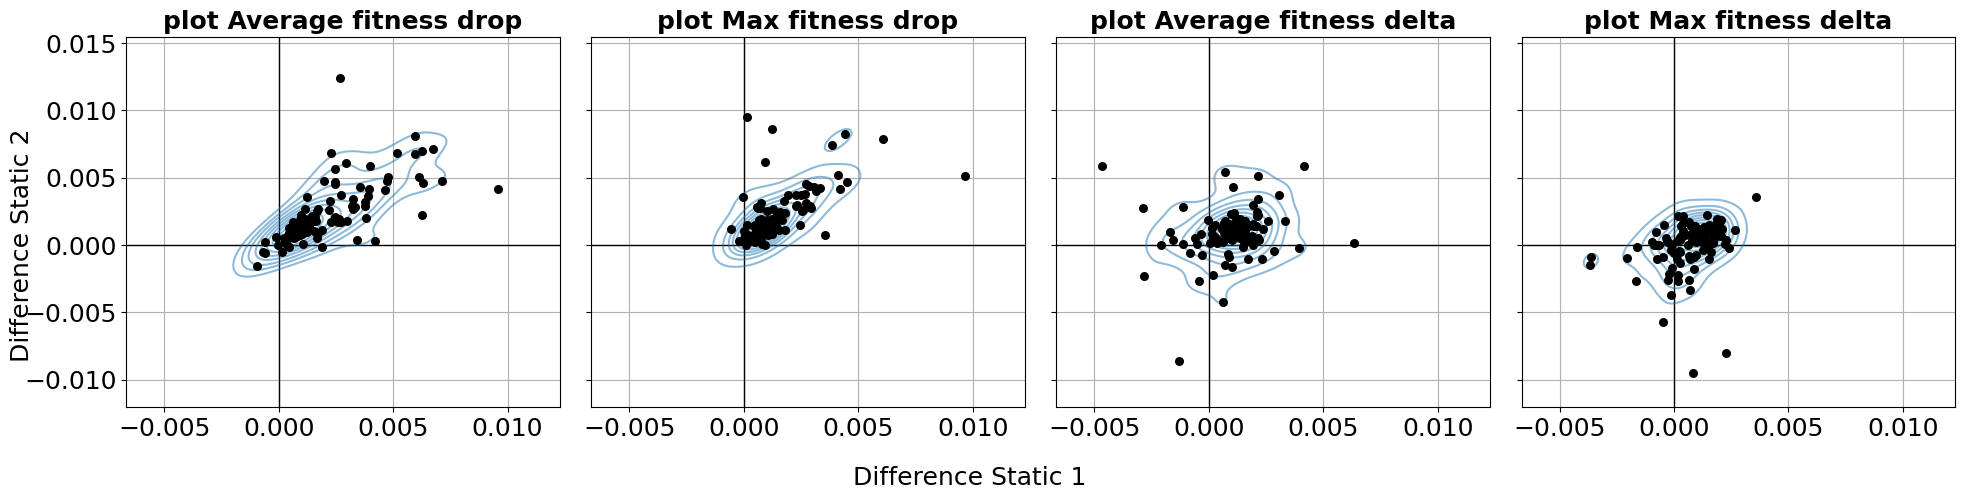

In [7]:
# Main figure and subplots
#fig, axs = plt.subplots(figsize=(6, 12), ncols=2, nrows = 2, sharex=True, sharey=True)
#axs = axs.flatten()

nrows,ncols = 1,4
scale = 5
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*scale, nrows*scale), sharex="row", sharey="row")
axs = axs.flatten()

titles=["Average fitness drop", "Max fitness drop","Average fitness delta", "Max fitness delta" ]

# Add lines to subplots
for idx,ax in enumerate(axs):
    ax.axvline(0, lw=1, color="black", zorder=1, alpha=1)
    ax.axhline(0, lw=1, color="black", zorder=1, alpha=1)

    if idx < 2:

        sns.kdeplot(x = all_exp_drop1[idx], y = all_exp_drop2[idx], ax=ax,fill=False,thresh=0.1,zorder=1,alpha=0.5)
        ax.scatter(all_exp_drop1[idx],all_exp_drop2[idx],marker="o", color="black", s=30)

    else:

        sns.kdeplot(x = all_exp_delta1[idx-2], y = all_exp_delta2[idx-2], ax=ax,fill=False,thresh=0.1,zorder=1,alpha=0.5)
        ax.scatter(all_exp_delta1[idx-2],all_exp_delta2[idx-2],marker="o", color="black", s=30)


    ax.set_title(f"plot {titles[idx]}", weight="bold", fontsize=18)

    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.grid()
    ax.set_axisbelow(True)


# Axis labels and titles
fig.supxlabel('Difference Static 1', fontsize = 18)
fig.supylabel('Difference Static 2', fontsize = 18)


#ax0.set_title("Maximum Fitness", weight="bold", fontsize=18)
#ax1.set_title("Average Fitness", weight="bold", fontsize=18)

plt.tight_layout()

#plt.show()
#plt.savefig('main_scatters.svg', format='svg')
plt.style.use('default')

/users/c/p/cpetak/miniconda3/envs/ca_grn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/users/c/p/cpetak/miniconda3/envs/ca_grn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/users/c/p/cpetak/miniconda3/envs/ca_grn/lib/python3.11/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'c'
  cset = contour_func(
/users/c/p/cpetak/miniconda3/envs/ca_grn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operat

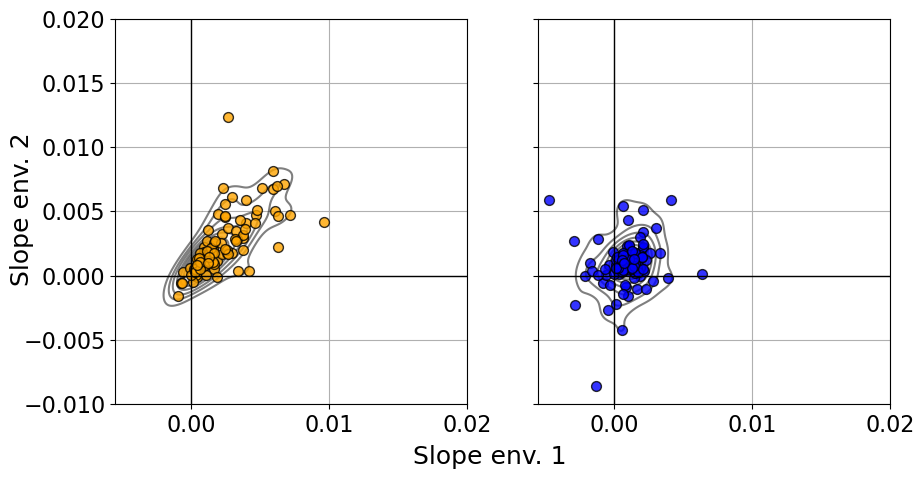

In [10]:
# Main figure and subplots
#fig, axs = plt.subplots(figsize=(6, 12), ncols=2, nrows = 2, sharex=True, sharey=True)
#axs = axs.flatten()

nrows,ncols = 1,2
scale = 5
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*scale, nrows*scale), sharex="row", sharey="row")
axs = axs.flatten()

titles=["Average fitness drop", "Max fitness drop","Average fitness delta", "Max fitness delta" ]

# Add lines to subplots


sns.kdeplot(x = all_exp_drop1[0], y = all_exp_drop2[0], ax=axs[0],fill=False,thresh=0.1,zorder=1,alpha=0.5,c="black")
axs[0].scatter(all_exp_drop1[0],all_exp_drop2[0],marker="o", color="orange", s=50,edgecolor="black", alpha=0.8)

# sns.kdeplot(x = all_exp_drop1[1], y = all_exp_drop2[1], ax=axs[0],fill=False,thresh=0.1,zorder=1,alpha=0.5)
# axs[0].scatter(all_exp_drop1[1],all_exp_drop2[1],marker="o", color="red", s=30)


sns.kdeplot(x = all_exp_delta1[0], y = all_exp_delta2[0], ax=axs[1],fill=False,thresh=0.1,zorder=1,alpha=0.5,c="black")
axs[1].scatter(all_exp_delta1[0],all_exp_delta2[0],marker="o", color="blue", s=50,edgecolor="black", alpha=0.8)

# sns.kdeplot(x = all_exp_delta1[1], y = all_exp_delta2[1], ax=axs[1],fill=False,thresh=0.1,zorder=1,alpha=0.5)
# axs[1].scatter(all_exp_delta1[1],all_exp_delta2[1],marker="o", color="red", s=30)

for ax in axs:
    ax.axvline(0, lw=1, color="black", zorder=1, alpha=1)
    ax.axhline(0, lw=1, color="black", zorder=1, alpha=1)

    #ax.set_title(f"plot {titles[idx]}", weight="bold", fontsize=18)

    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.grid()
    ax.set_axisbelow(True)

    ax.set_xlim(-0.0055, 0.02)
    ax.set_ylim(-0.01, 0.02)


# Axis labels and titles
fig.supxlabel('Slope env. 1', fontsize = 18,y=-0.02)
fig.supylabel('Slope env. 2', fontsize = 18)

#plt.tight_layout()

#plt.xlims(-0.005, 0.015)

#plt.show()
#plt.savefig('main_scatters.svg', format='svg')
plt.savefig("evolvability_fig.pdf", bbox_inches="tight")
plt.style.use('default')

/users/c/p/cpetak/miniconda3/envs/ca_grn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/users/c/p/cpetak/miniconda3/envs/ca_grn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/users/c/p/cpetak/miniconda3/envs/ca_grn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/users/c/p/cpetak/miniconda3/envs/ca_grn/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as

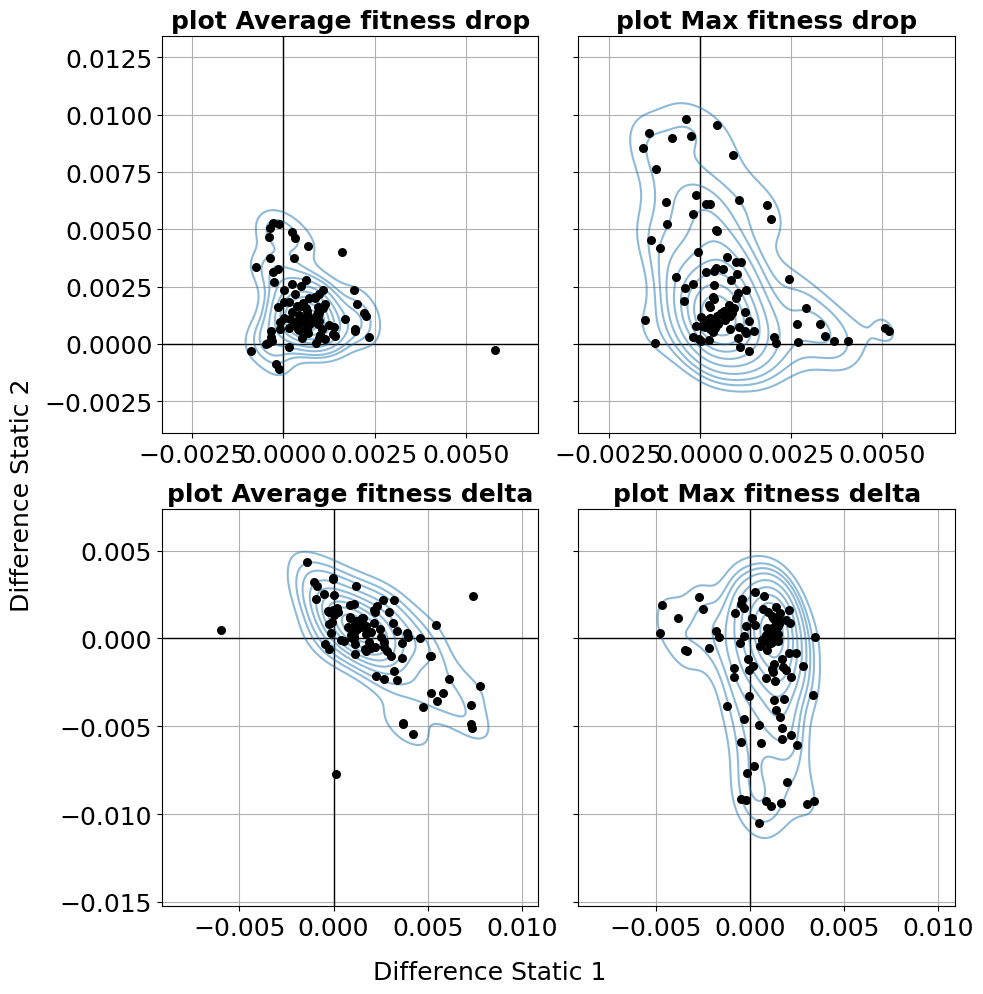

In [30]:
# Main figure and subplots
#fig, axs = plt.subplots(figsize=(6, 12), ncols=2, nrows = 2, sharex=True, sharey=True)
#axs = axs.flatten()

nrows,ncols = 2,2
scale = 5
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*scale, nrows*scale), sharex="row", sharey="row")
axs = axs.flatten()

titles=["Average fitness drop", "Max fitness drop","Average fitness delta", "Max fitness delta" ]

# Add lines to subplots
for idx,ax in enumerate(axs):
    ax.axvline(0, lw=1, color="black", zorder=1, alpha=1)
    ax.axhline(0, lw=1, color="black", zorder=1, alpha=1)

    if idx < 2:

        sns.kdeplot(x = all_exp_drop1[idx+2], y = all_exp_drop2[idx+2], ax=ax,fill=False,thresh=0.1,zorder=1,alpha=0.5)
        ax.scatter(all_exp_drop1[idx+2],all_exp_drop2[idx+2],marker="o", color="black", s=30)

    else:

        sns.kdeplot(x = all_exp_delta1[idx], y = all_exp_delta2[idx], ax=ax,fill=False,thresh=0.1,zorder=1,alpha=0.5)
        ax.scatter(all_exp_delta1[idx],all_exp_delta2[idx],marker="o", color="black", s=30)


    ax.set_title(f"plot {titles[idx]}", weight="bold", fontsize=18)

    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.grid()
    ax.set_axisbelow(True)


# Axis labels and titles
fig.supxlabel('Difference Static 1', fontsize = 18)
fig.supylabel('Difference Static 2', fontsize = 18)


#ax0.set_title("Maximum Fitness", weight="bold", fontsize=18)
#ax1.set_title("Average Fitness", weight="bold", fontsize=18)

plt.tight_layout()

#plt.show()
#plt.savefig('main_scatters.svg', format='svg')
plt.style.use('default')

In [23]:
import pickle

data = {
    'drops1': all_exp_drop1,
    'drops2': all_exp_drop2,
    'incs1': all_exp_inc1,
    'incs2': all_exp_inc2,
    'delta1': all_exp_delta1,
    'delta2': all_exp_delta2
}

# Save to a file
with open('evolv_measures2.pkl', 'wb') as f:
    pickle.dump(data, f)

In [26]:
with open('evolv_measures2.pkl', 'rb') as f:
    loaded_data = pickle.load(f)

loaded_data["delta1"] == all_exp_delta1

True

In [ ]:
vari_maxs=[np.loadtxt(os.path.expanduser(root+f"variable/stats_{season_len}_{rules[0]}-{rules[1]}_{seed_ints[0]}-{seed_ints[1]}_{i+1+id_start}_{metric}.txt")) for i in range(num_reps)]


True

22


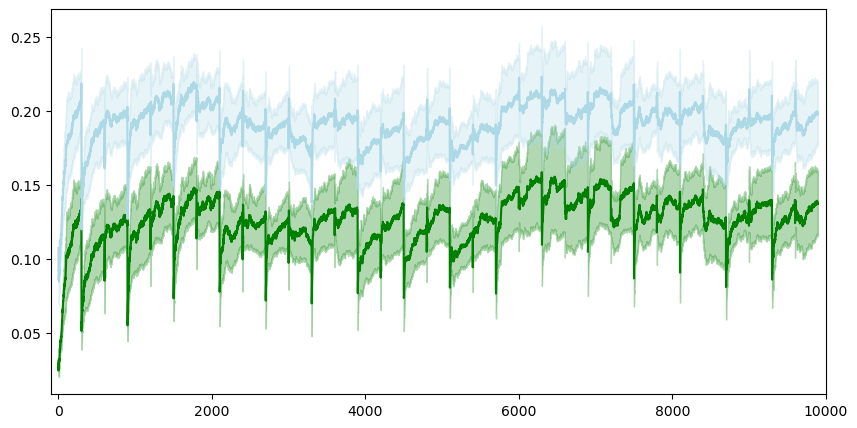

126


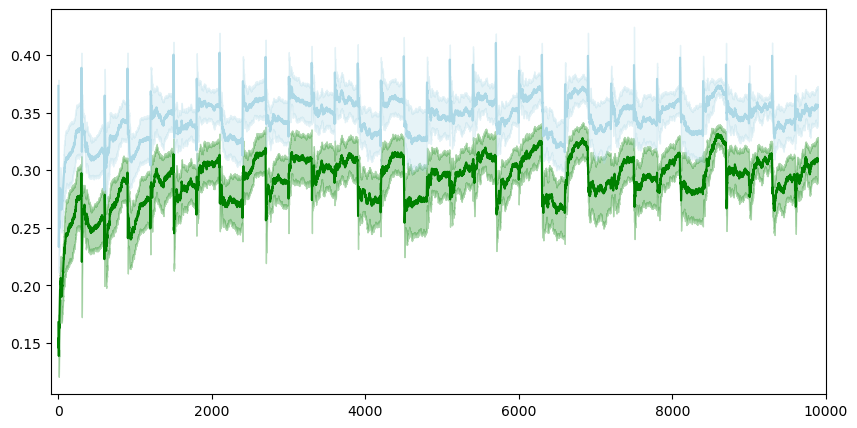

154


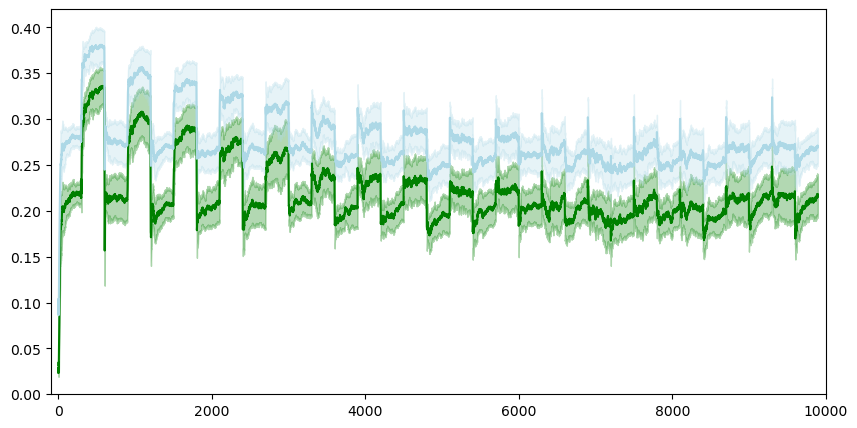

18


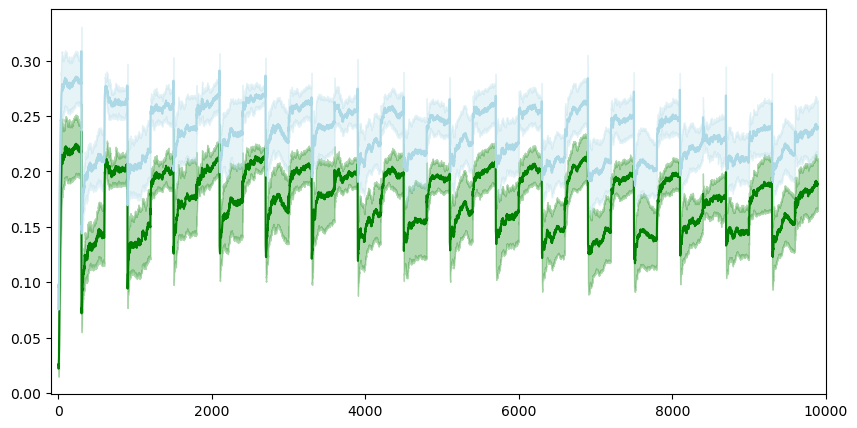

122


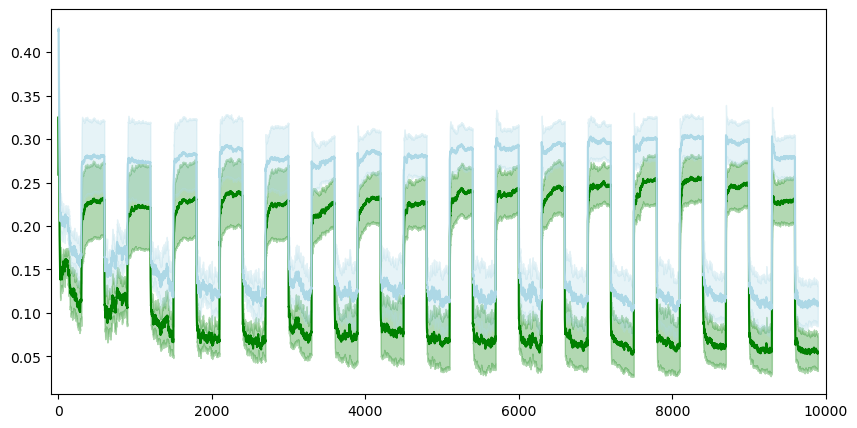

70


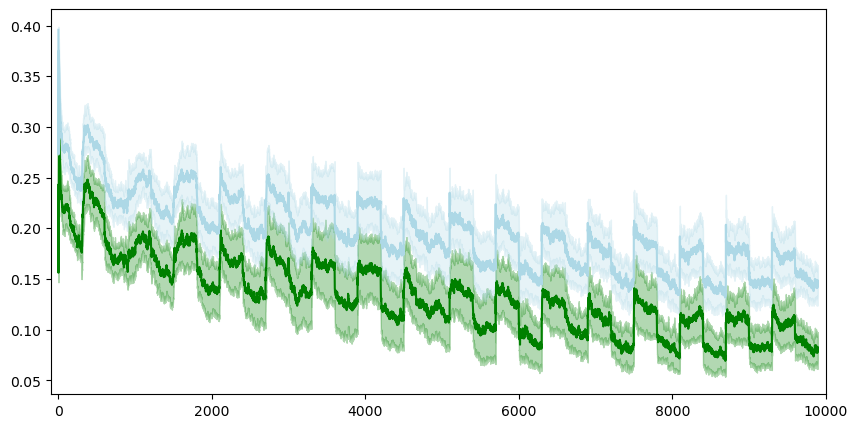

54


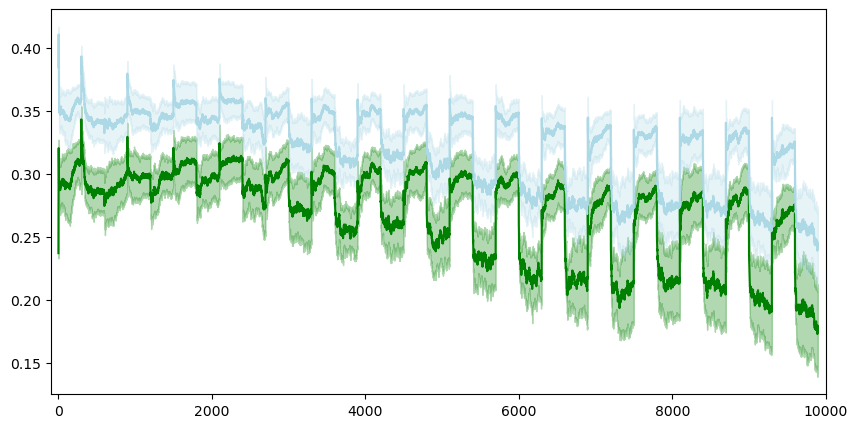

94


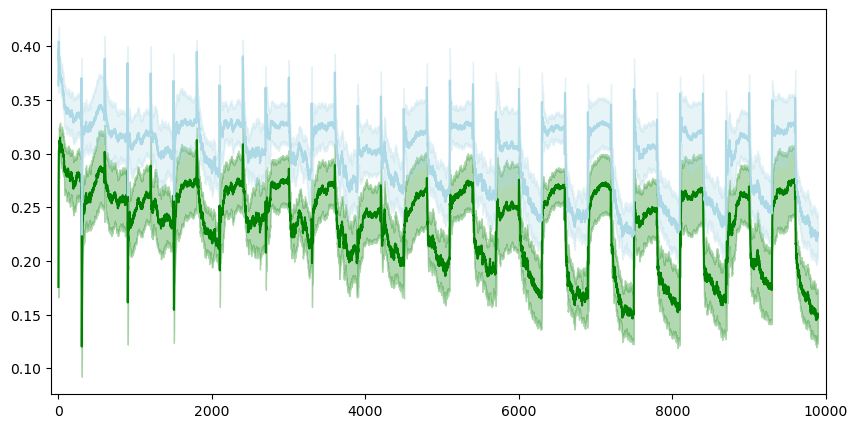

30


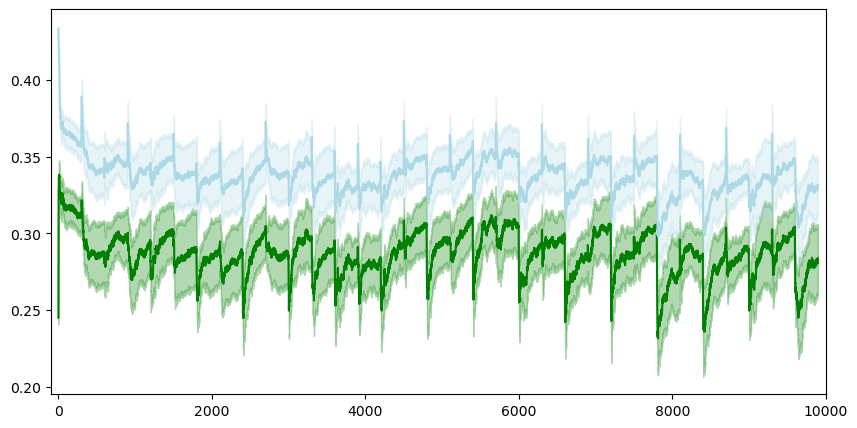

50


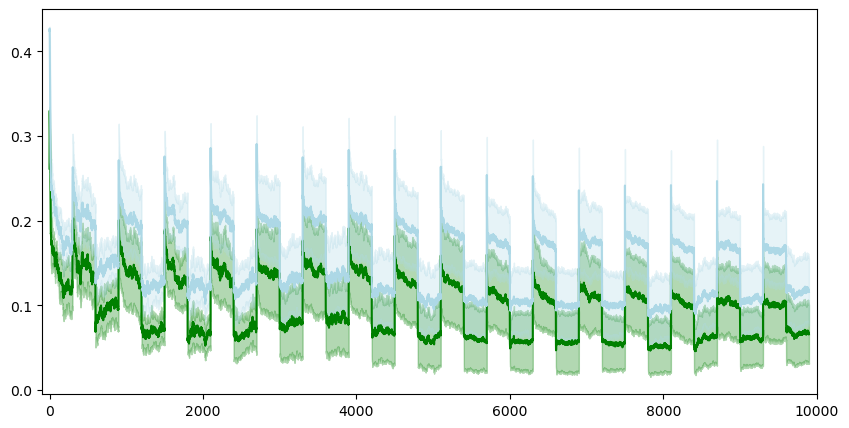

62


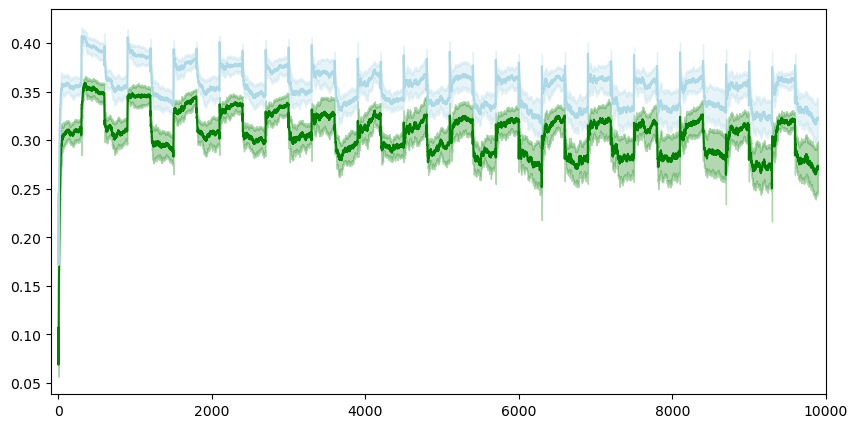

110


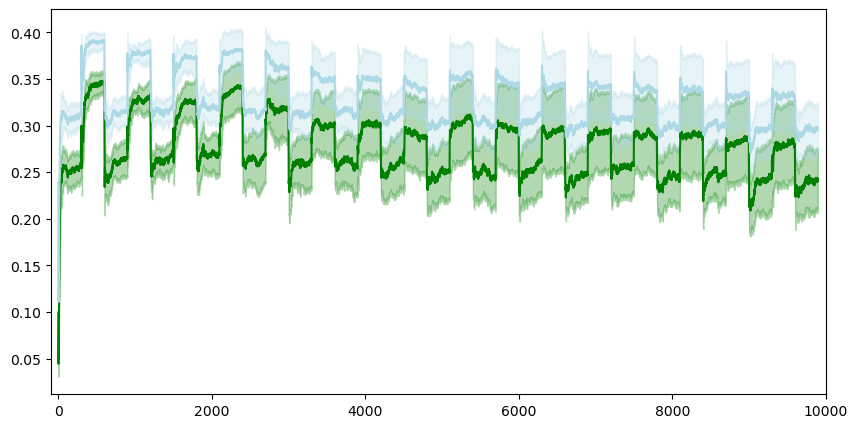

90


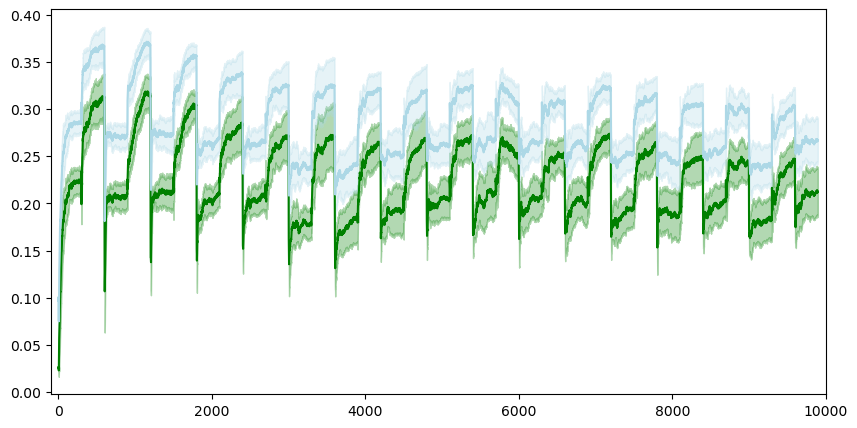

150


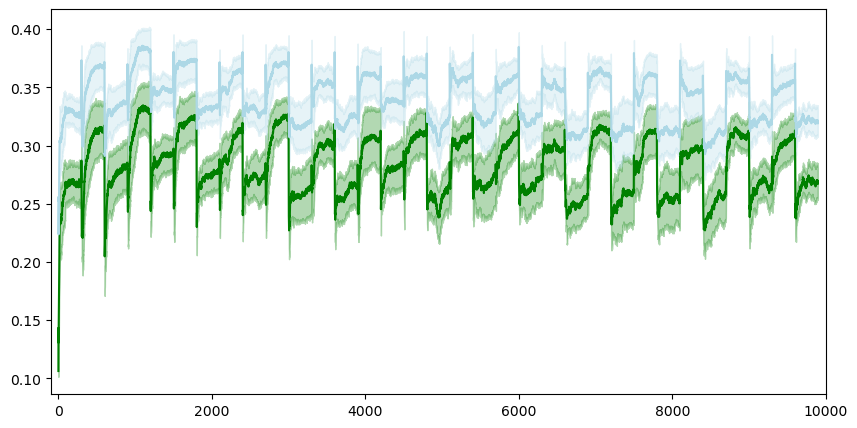

102


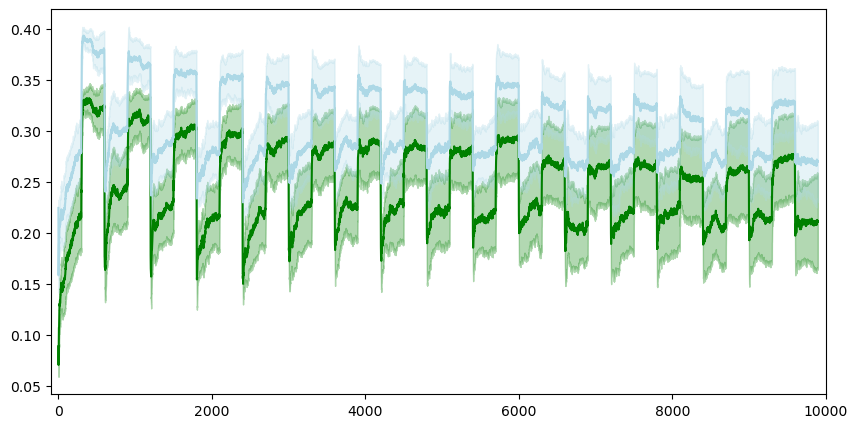

In [7]:
seed_intss = [[69904,149796]] # [[69904,149796],[4147842,1238860],[1677032,1410667],[2607162,1754028],[286634,159689],[2961036,153075],[3430997,2634107]]
metric="pheno_stds"
season_len = 300
num_reps=15
root="~/scratch/non_detailed_save/full_pheno_std/"
root2="~/CA_GRN_results/detailed_save/static/"
id_start=0
seed_ints = seed_intss[0]

rules = [22, 126, 154, 18, 122, 70,54,94,30,50,62,110,90,150,102]


labels=["vari","env1","env2"]
colors = ["green", "lightblue", "orange"]

for si in seed_intss:
    for rule in rules:
        print(rule)

        phenos=[np.loadtxt(os.path.expanduser(root+f"stats_{season_len}_{rule}-{rule}_{si[0]}-{si[1]}_{i+1+id_start}_{metric}.txt")) for i in range(num_reps)]
        env1_phenos=[np.loadtxt(os.path.expanduser(root+f"stats_{season_len}_{rule}-{rule}_{si[0]}-{si[1]}_{i+1+id_start}_all_pheno_stds.txt")) for i in range(num_reps)]

        #env1_phenos=[np.loadtxt(os.path.expanduser(root2+f"stats_100000_{rule}_{si[0]}_{i+1+id_start}_{metric}.txt")) for i in range(num_reps)]
        #env2_phenos=[np.loadtxt(os.path.expanduser(root2+f"stats_100000_{rule}_{si[1]}_{i+1+id_start}_{metric}.txt")) for i in range(num_reps)]

        
        fig, ax=plt.subplots(nrows=1,ncols=1, figsize=(10, 5),sharex=True) #sharey=True)
        
        mean1 = np.mean(phenos, axis=0)
        #The line itself
        stderr1 = np.std(phenos, axis=0) / np.sqrt(num_reps)
        z_value = 1.96  # For a 95% confidence interval
        ci_upper = mean1 + z_value * stderr1
        ci_lower = mean1 - z_value * stderr1
        ax.fill_between(range(len(mean1)), ci_lower, ci_upper, alpha=0.3,color=colors[0])
        ax.plot(mean1, "-", label= metric, color="green")
        ax.set_xlim(-100,10_000)

        mean1 = np.mean(env1_phenos, axis=0)
        stderr1 = np.std(env1_phenos, axis=0) / np.sqrt(num_reps)
        ci_upper = mean1 + z_value * stderr1
        ci_lower = mean1 - z_value * stderr1
        ax.fill_between(range(len(mean1)), ci_lower, ci_upper, alpha=0.3, color = colors[1])
        ax.plot(mean1, "-", label="env1", color = colors[1])

        # mean1 = np.mean(env2_phenos, axis=0)
        # stderr1 = np.std(env2_phenos, axis=0) / np.sqrt(num_reps)
        # ci_upper = mean1 + z_value * stderr1
        # ci_lower = mean1 - z_value * stderr1
        # ax.fill_between(range(len(mean1)), ci_lower, ci_upper, alpha=0.3, color = colors[2])
        # ax.plot(mean1, "-", label="env2", color = colors[2])


        plt.show()